 #!pip3 install umap-learn<br>
 https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi

In [32]:
 !pip3 install umap-learn

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap.umap_ as umap
from sklearn.decomposition import PCA
import pandas as pd


%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

# 랜덤 데이터  생성

In [34]:
np.random.seed(42)
data = np.random.rand(800, 7)

In [35]:
data

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.15601864, 0.15599452,
        0.05808361],
       [0.86617615, 0.60111501, 0.70807258, ..., 0.96990985, 0.83244264,
        0.21233911],
       [0.18182497, 0.18340451, 0.30424224, ..., 0.43194502, 0.29122914,
        0.61185289],
       ...,
       [0.43913066, 0.03994797, 0.36229349, ..., 0.7014991 , 0.45934366,
        0.05510154],
       [0.42689473, 0.46902494, 0.92855553, ..., 0.31165292, 0.52531826,
        0.06605531],
       [0.97256824, 0.3600599 , 0.47786735, ..., 0.68251173, 0.66223216,
        0.71532231]])

# Principal Component analysis

In [36]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정

printcipalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [37]:
pca.explained_variance_ # 설명력이 높은 순서대로

array([0.09408422, 0.09144243])

In [38]:
principalDf

,principal component1,principal component2
0,0.038518,0.088680
1,-0.051747,-0.440596
2,-0.151669,0.275096
3,-0.297278,0.346515
4,0.138247,-0.607890
...,...,...
795,0.276982,0.378855
796,-0.046547,-0.654238
797,0.311939,0.516789
798,0.390766,-0.027483


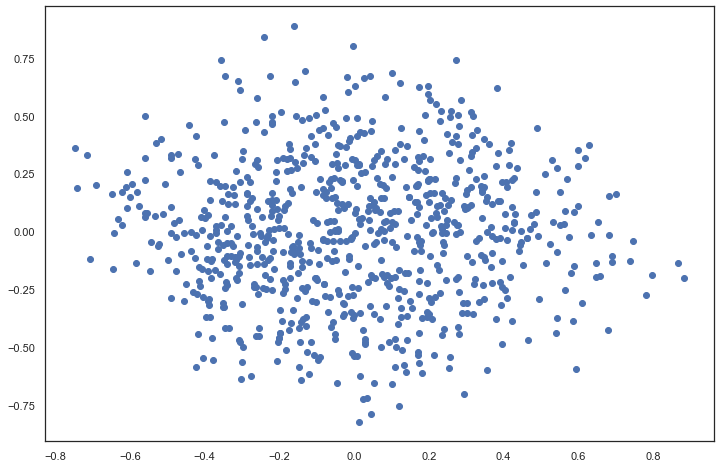

In [39]:
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])

<br><br>
랜덤 데이터로 UMAP 학습 및 시각화

In [40]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

Wall time: 2.63 s


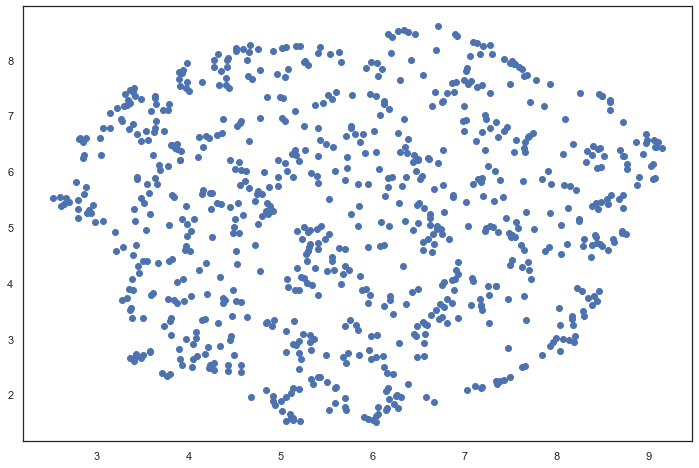

In [41]:
plt.scatter(u[:,0], u[:,1])

In [42]:
import pandas as pd
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
from sklearn.preprocessing import LabelEncoder

iris = load_iris() # sample data load

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# categorize output class labels to numeric values
le = LabelEncoder()
le.fit(data['target'])
data['target'] = le.transform(data['target'])

In [59]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

In [44]:
fit = umap.UMAP()
%time u = fit.fit_transform(X)

Wall time: 1.88 s


In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

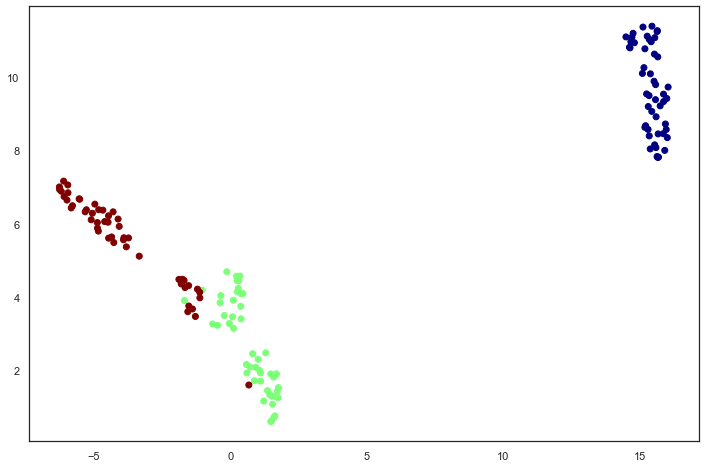

In [46]:
plt.scatter(u[:,0], u[:,1], c=y, cmap = 'jet')

Lung Cancer 데이터를 활용한 Dimensional Reduction

In [47]:
Data = pd.read_csv("Censored_clinical_lungCancer_survival.csv")

In [48]:
Data.head()

,Age,Sex,Smoke,COPD,DM,HTN,CEA_pre,SUV,Extent,Vascular,...,pT,pN,pStage,cell,Subtype,CEA_Post,Relapse,Recurrence,Death,Overall
0,73,2,1,0,0,1,1.0,4.11,3,0,...,2,2,4,1,4,0.0,0,107.833333,0,107.833333
1,73,1,1,0,0,0,1.4,3.50,3,0,...,2,2,4,1,3,1.2,0,144.033333,0,144.033333
2,53,1,1,0,0,0,1.7,4.20,3,0,...,1,2,4,1,3,1.8,1,23.233333,1,48.066667
3,57,2,1,0,1,1,1.0,1.60,3,0,...,2,2,4,1,4,0.0,0,93.533333,0,93.533333
4,42,1,2,0,0,0,1.0,3.30,3,0,...,1,3,5,1,2,1.2,0,93.066667,0,93.066667


In [49]:
Data.columns

Index(['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre', 'SUV', 'Extent',
       'Vascular', 'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous',
       'pT', 'pN', 'pStage', 'cell', 'Subtype', 'CEA_Post', 'Relapse',
       'Recurrence', 'Death', 'Overall'],
      dtype='object')

In [50]:
Data = Data[['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre', 'SUV', 'Extent', 'Vascular', 'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous', 'pT', 'pN', 'pStage', 'cell', 'Subtype', 'CEA_Post', 'Relapse', 'Recurrence', 'Death', 'Overall']]

In [51]:
Data.isna().sum()

Age            0
Sex            0
Smoke          0
COPD           0
DM             0
HTN            0
CEA_pre       37
SUV           76
Extent         0
Vascular       0
Lymphatic      0
Perineural     0
VPI            0
Adjacent       0
Aerogenous     0
pT             0
pN             0
pStage         0
cell           0
Subtype        0
CEA_Post      29
Relapse        0
Recurrence     0
Death          0
Overall        0
dtype: int64

In [52]:
Data = Data.dropna()

In [53]:
### Death를 빼고 데이터를 UMAP으로 projection
Data_tmp = Data[['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre', 'SUV', 'Extent', 'Vascular',
      'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous', 'pStage', 'pT', 'pN', 
      'cell', 'Subtype', 'CEA_Post', 'Relapse', 'Recurrence', 'Overall']]

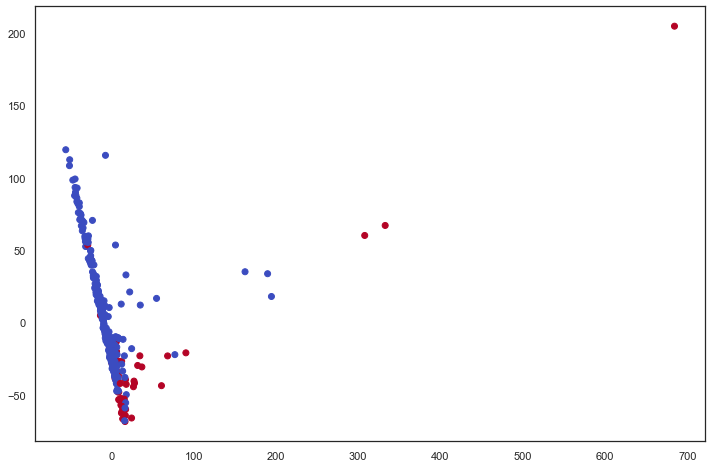

In [54]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Data_tmp)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=Data['Death'], cmap='coolwarm')

Wall time: 2 s


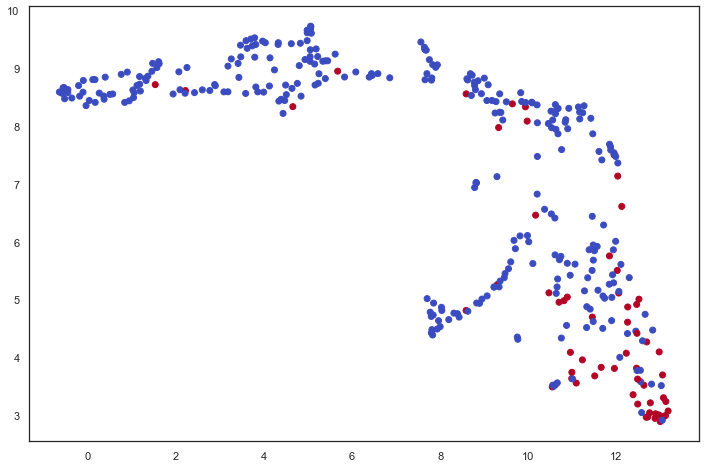

In [55]:
fit = umap.UMAP(n_neighbors=20)
%time u = fit.fit_transform(Data_tmp)

plt.scatter(u[:,0], u[:,1], c=Data['Death'], cmap='coolwarm')

Wall time: 2.03 s


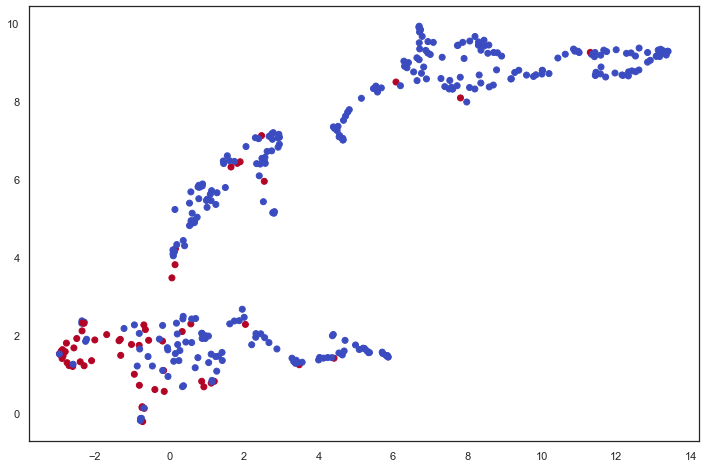

In [56]:
fit = umap.UMAP(n_neighbors=10)
%time u = fit.fit_transform(Data_tmp)

plt.scatter(u[:,0], u[:,1], c=Data['Death'], cmap='coolwarm')

Wall time: 2.42 s


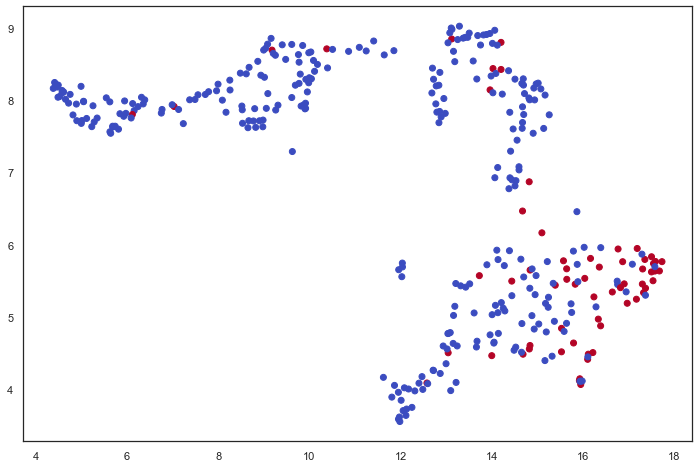

In [57]:
fit = umap.UMAP(n_neighbors=30)
%time u = fit.fit_transform(Data_tmp)

plt.scatter(u[:,0], u[:,1], c=Data['Death'], cmap='coolwarm')

In [58]:
u

array([[ 4.9957576,  7.6787724],
       [ 4.4104958,  8.244643 ],
       [14.441166 ,  5.49756  ],
       [ 6.1553674,  7.856112 ],
       [ 6.122682 ,  7.952958 ],
       [16.220488 ,  4.5095463],
       [14.826635 ,  4.5589647],
       [14.823502 ,  6.8711524],
       [ 4.897109 ,  7.715841 ],
       [10.381686 ,  8.709504 ],
       [15.924779 ,  4.121818 ],
       [11.985296 ,  3.5557427],
       [ 4.3805428,  8.162625 ],
       [12.57967  ,  4.0887723],
       [11.975504 ,  3.618327 ],
       [ 7.032871 ,  7.9122944],
       [ 4.4352427,  8.221744 ],
       [ 5.9461403,  7.989362 ],
       [ 9.626585 ,  7.2894416],
       [14.002195 ,  4.466812 ],
       [11.954916 ,  3.5893068],
       [17.506449 ,  5.6245914],
       [15.395295 ,  5.441021 ],
       [15.954336 ,  4.0677342],
       [15.934208 ,  4.147126 ],
       [ 4.6072783,  8.114006 ],
       [12.314283 ,  3.9793255],
       [13.122343 ,  8.846108 ],
       [12.119009 ,  3.6403375],
       [12.057398 ,  3.7068229],
       [ 4